Goal: Is there autocorrelation in the data?

Warning message in log(y):
“NaNs produced”


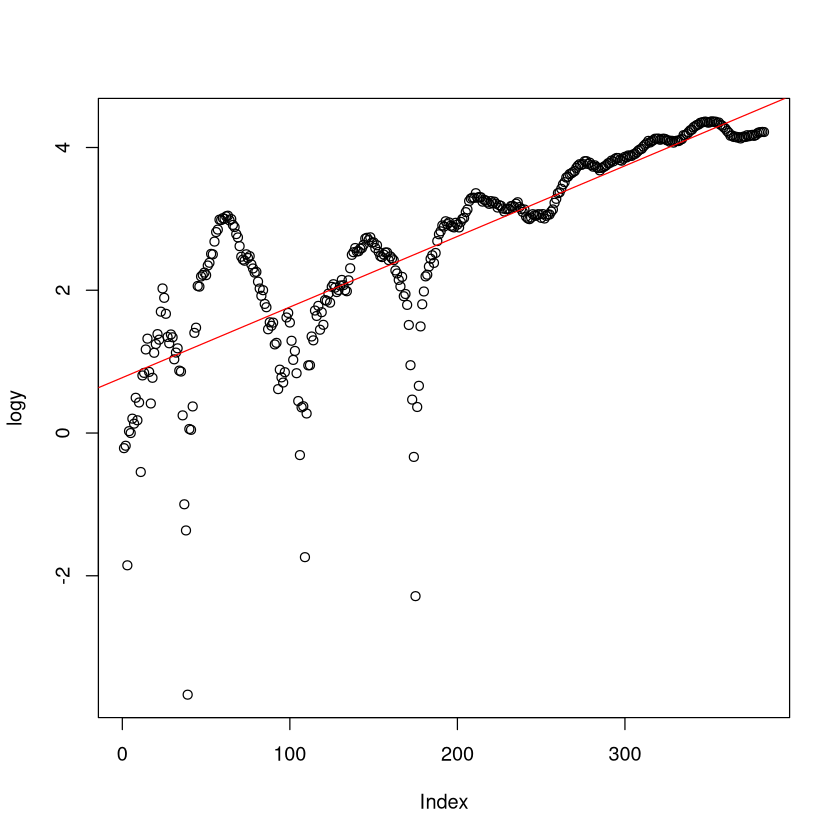

In [3]:
data <- read.csv("TimeSeriesSim.csv")
y = data[4:1000,]
logy = na.omit(log(y))
LEN = length(logy)
# Fit a line to the data
x = (1:LEN)
line = lm(formula=logy~x)
plot(logy)
# Add a regression line to the plot
abline(line, col = "red")

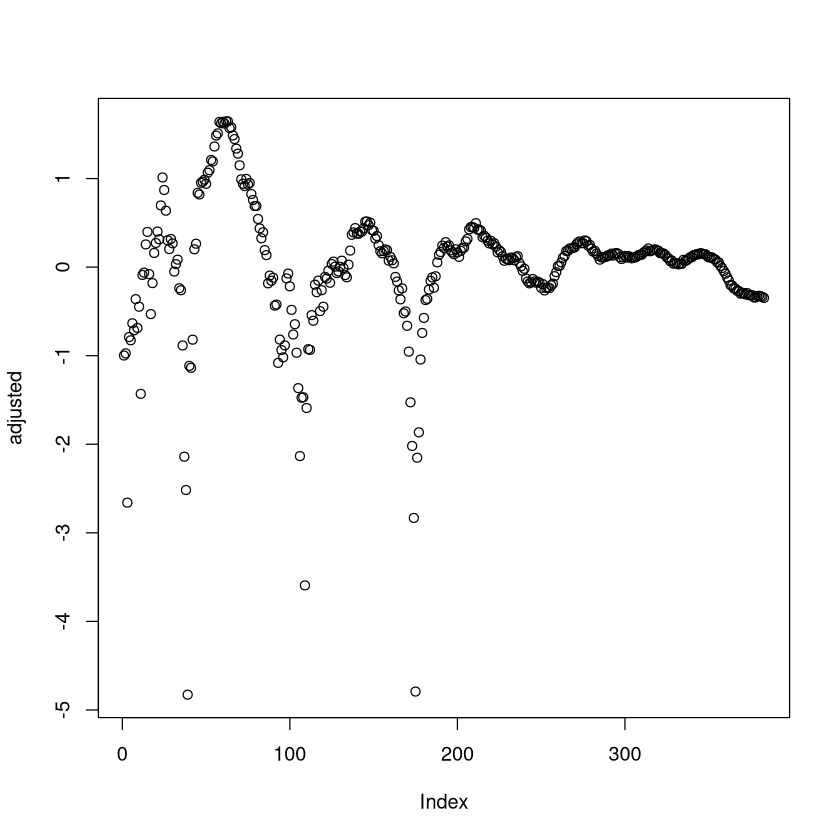

In [4]:
# De-trend ---- remove the trend of increasing mean
trendline_vals <- predict(line)
adjusted = logy - trendline_vals
plot(adjusted)

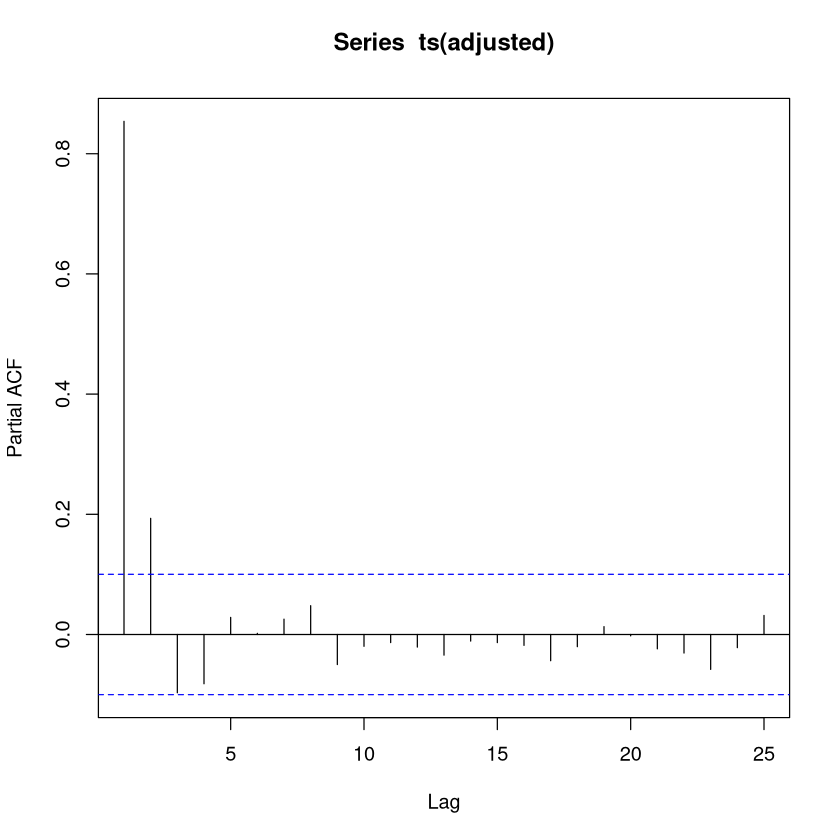

In [5]:
# cor(x[2:99], x[3:100])
# cor(x[2:98], x[4:100])
# cor(x[2:97], x[5:100])
# cor(x[2:96], x[6:100])
pacf(ts(adjusted))

Goal: fit a model to the data above

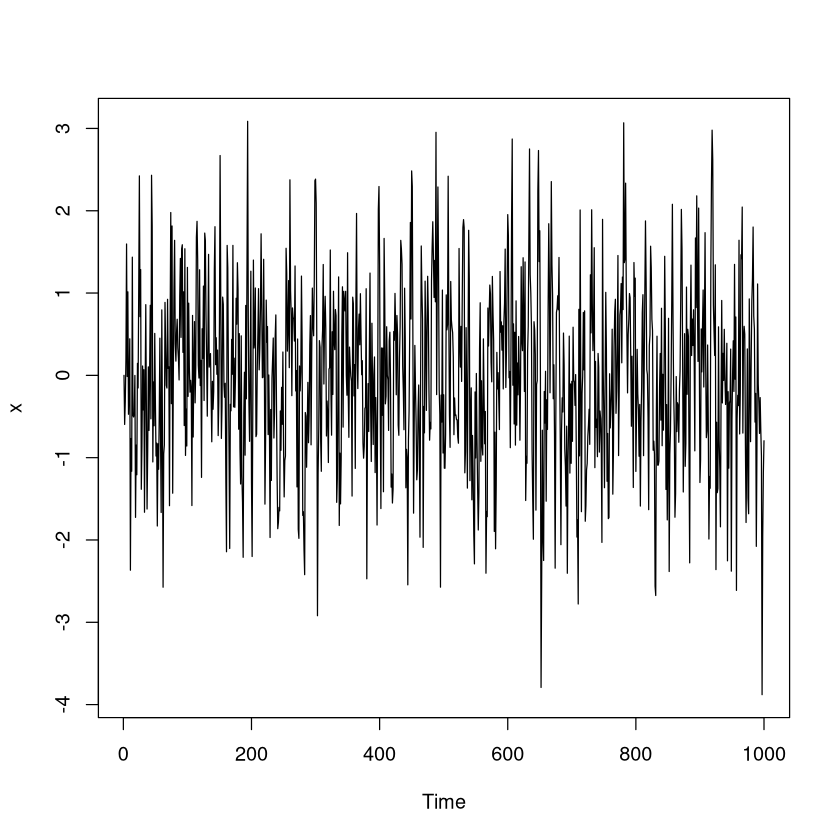

In [6]:
# AR1
x <- numeric(1000)
e <- rnorm(1000)
for (i in 2:1000){
    x[i] <- .4*x[i-1] + e[i]
}
plot.ts(x)

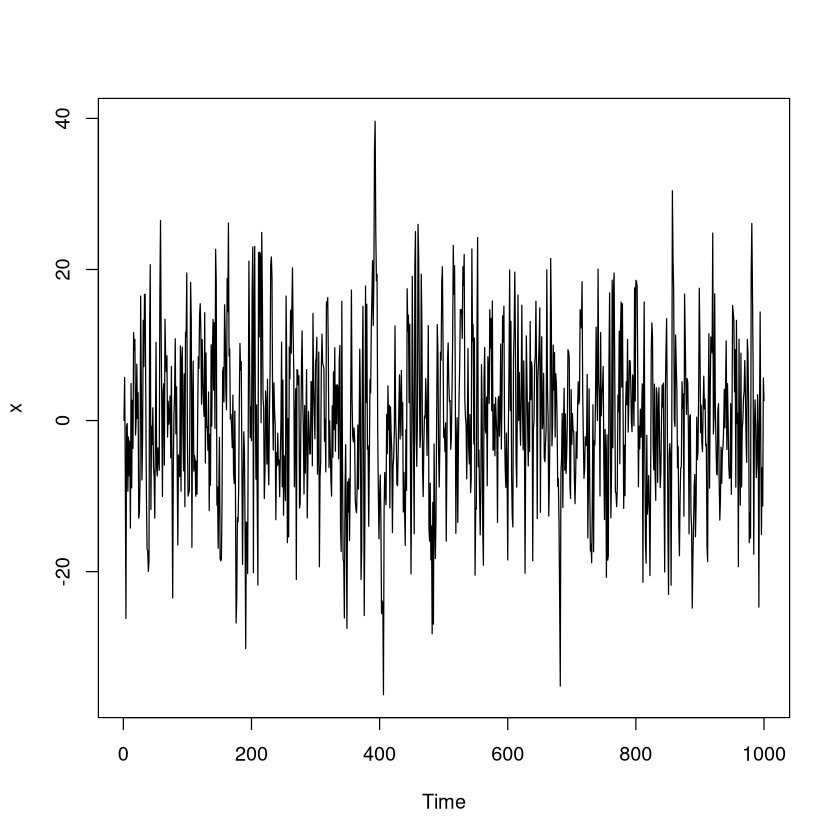

In [11]:
# ARMA11
x <- numeric(1000)
e <- rnorm(1000,0,10)
for ( i in 2:1000){
    x[i] <- e[i] + .4*x[i-1] + .04*e[i-1]
    }
plot.ts(x)

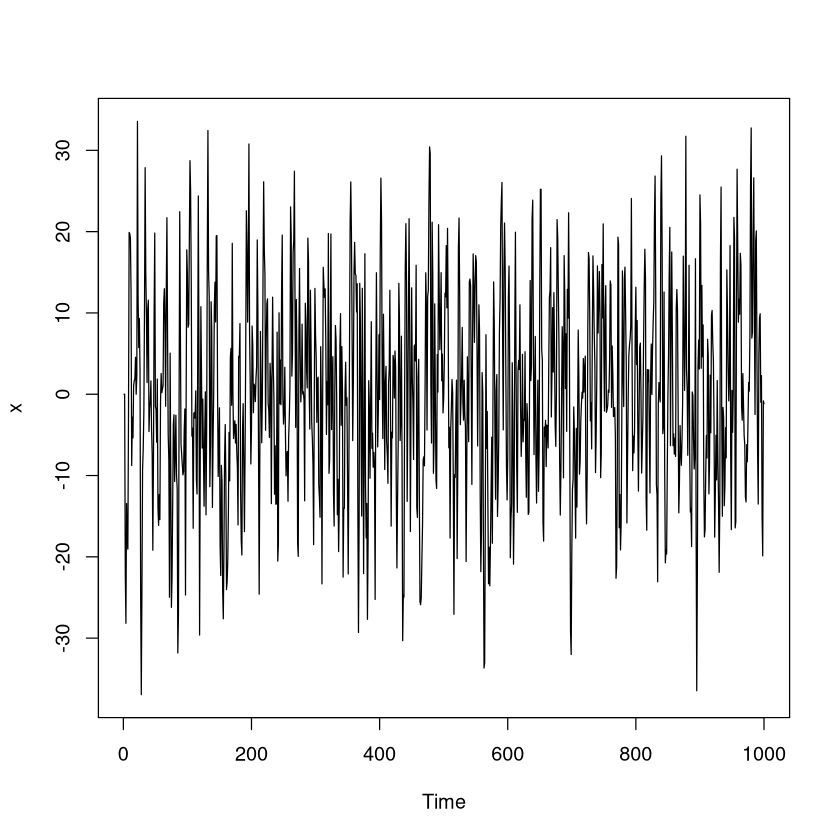

In [11]:
# ARMA22
x <- numeric(1000)
e <- rnorm(1000,0,10)
for ( i in 3:1000){
    x[i] <- e[i] + .05*x[i-1] + .005*x[i-2] + .7*e[i-1] + .1*e[i-2]
    }
plot.ts(x)

Goal: Simulate a time series

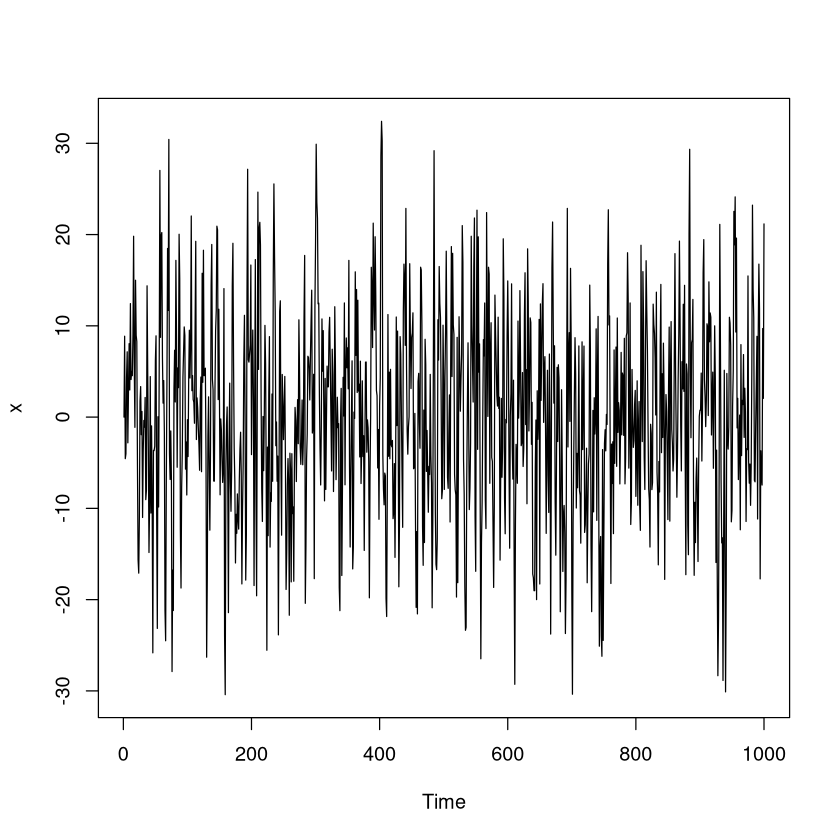

In [8]:
# ARMA11
x <- numeric(1000)
e <- rnorm(1000,0,10)
for ( i in 2:1000){
    x[i] <- e[i] + .2*x[i-1] + .3*e[i-1]
    }
plot.ts(x)

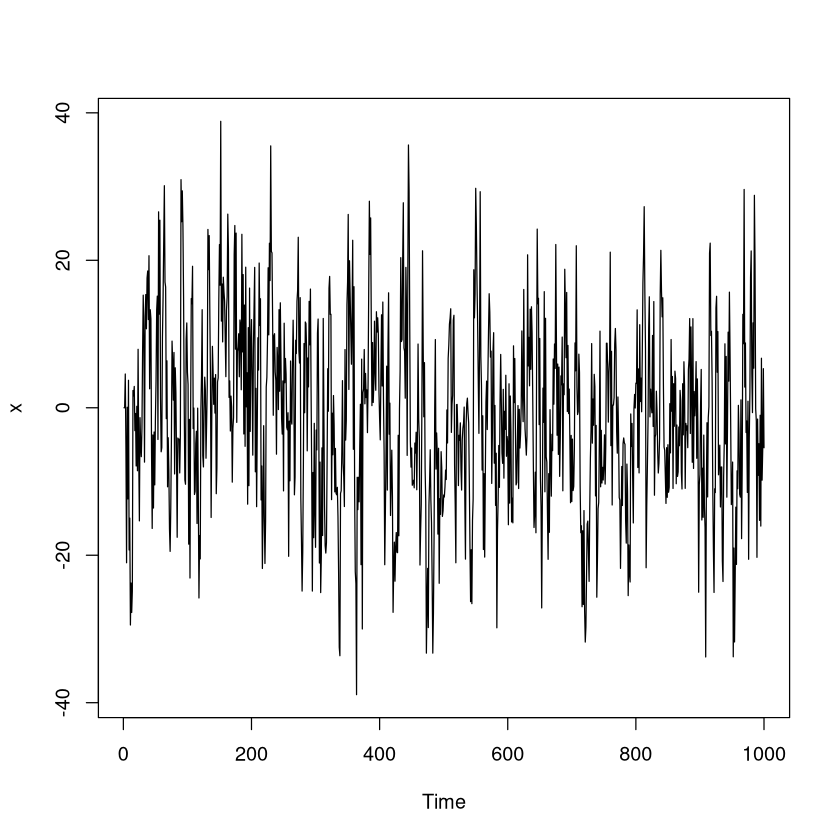

In [2]:
# ARMA22
x <- numeric(1000)
e <- rnorm(1000,0,10)
for ( i in 3:1000){
    x[i] <- e[i] + .2*x[i-1] + .2*x[i-2] + .3*e[i-1] + .3*e[i-2]
    }
plot.ts(x)

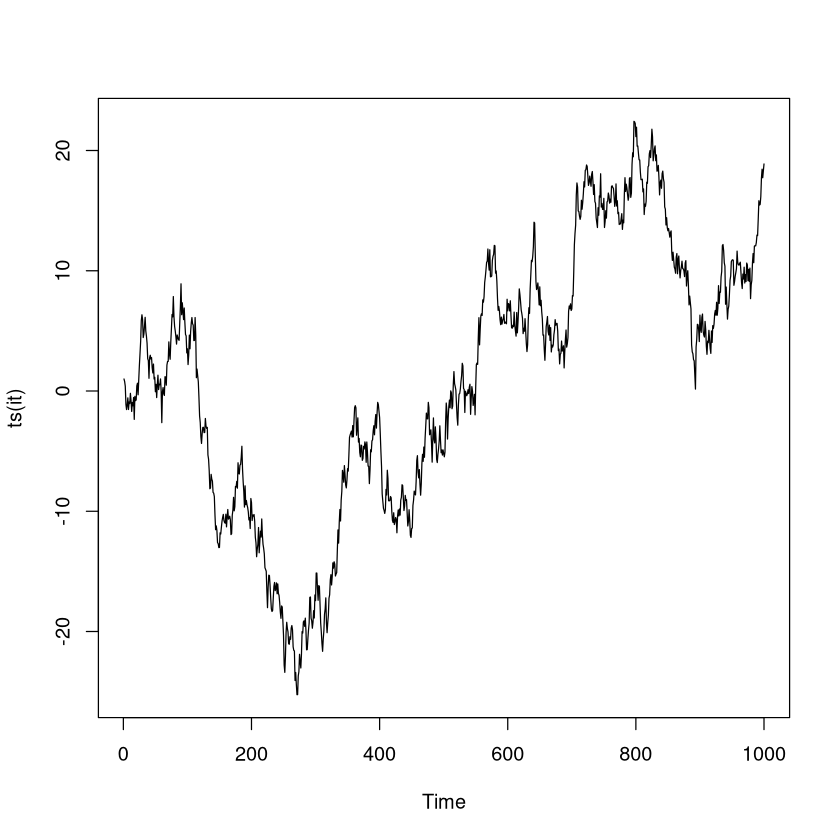

In [5]:
# Random Walk model
noise = rnorm(1000)
it = c(1)
for (i in 2:1000) {
    it[i] = it[i-1] + noise[i-1] 
}
plot(ts(it))

Goal: Inspect first difference of the S&P 500

Warning message in na.omit(as.numeric(sp500[11:1314, 2])):
“NAs introduced by coercion”


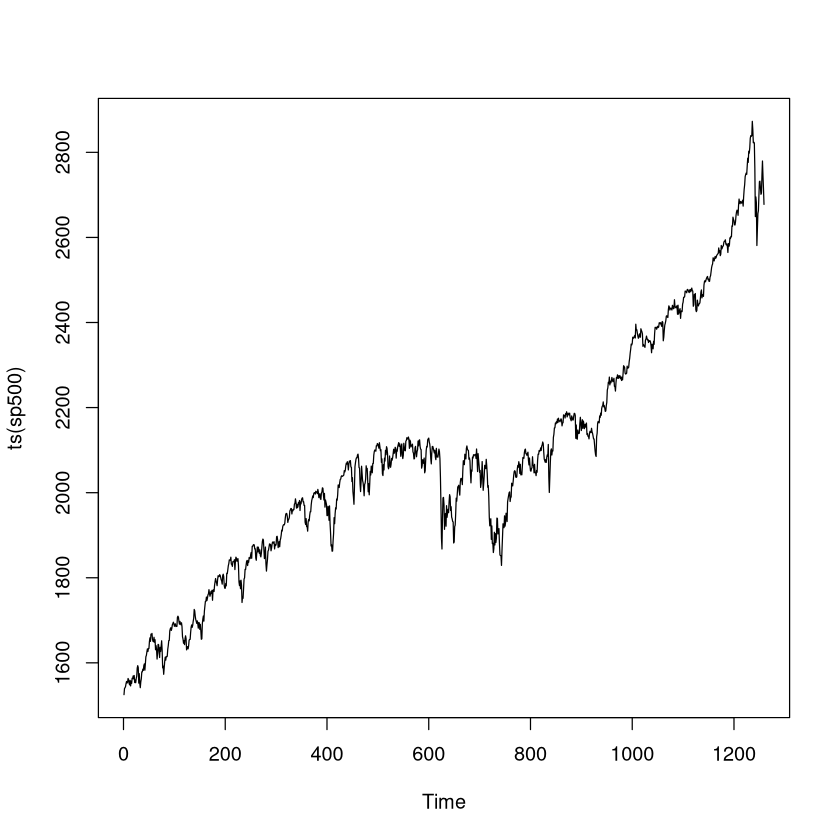

In [21]:
sp500 <- read.csv("SP500.csv")
sp500 <- na.omit(as.numeric(sp500[11:1314,2]))
plot(ts(sp500))

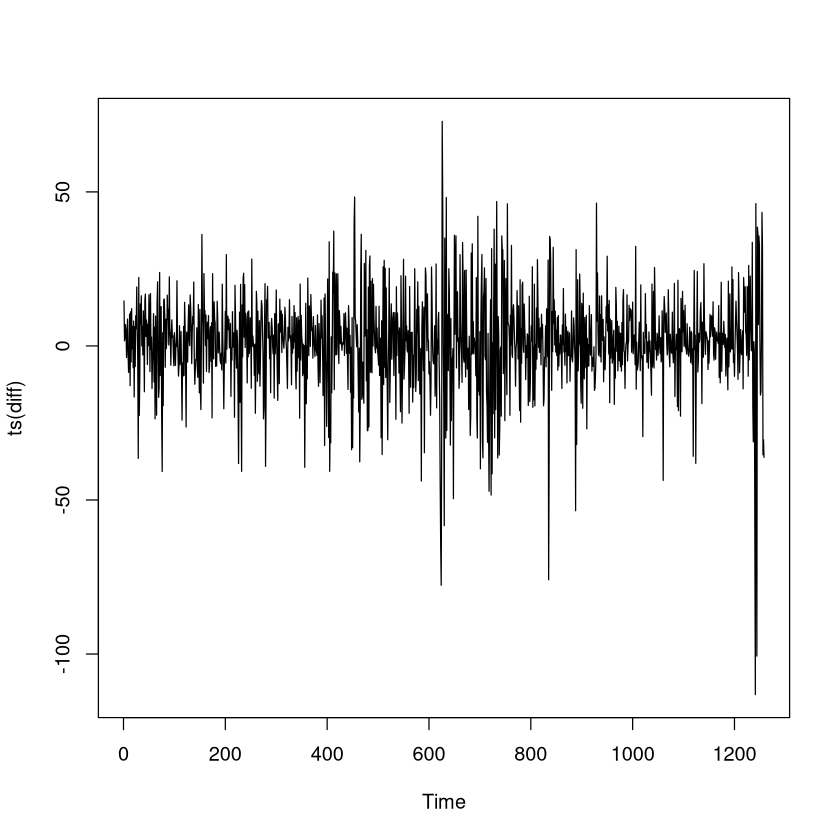

In [26]:
diff = c()
for (i in 2:1259) {
    diff[i-1] = sp500[i] - sp500[i-1]
}
plot(ts(diff))

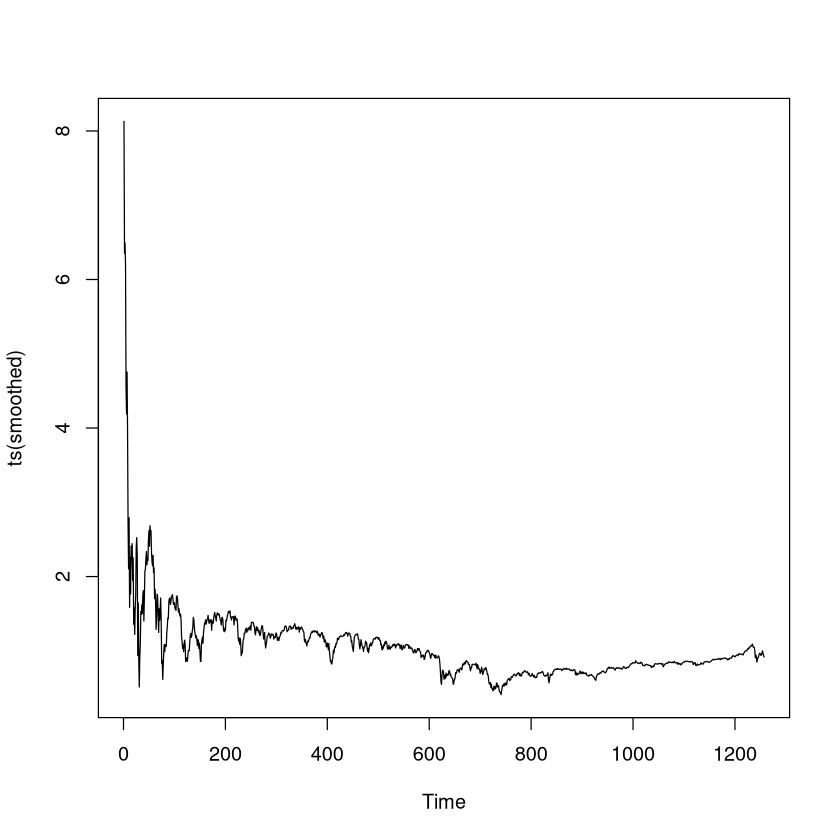

In [27]:
# Moving Average Smoothing
smoothed = c()
for (i in 2:1258) {
    smoothed[i-1] = mean(diff[i-1:i+1])
}
plot(ts(smoothed))